In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv(r"/Users/phongsaphak/Documents/data_set/banana_quality.csv")
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [92]:
df.isna().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Quality"] = le.fit_transform(df["Quality"])
df.head()
# 1 = good

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,8000.0,-0.747802,2.136023,-7.998074,-2.277651,-0.897514,0.654216,7.970800
Weight,8000.0,-0.761019,2.015934,-8.283002,-2.223574,-0.868659,0.775491,5.679692
Sweetness,8000.0,-0.770224,1.948455,-6.434022,-2.107329,-1.020673,0.311048,7.539374
Softness,8000.0,-0.014441,2.065216,-6.959320,-1.590458,0.202644,1.547120,8.241555
HarvestTime,8000.0,-0.751288,1.996661,-7.570008,-2.120659,-0.934192,0.507326,6.293280
Ripeness,8000.0,0.781098,2.114289,-7.423155,-0.574226,0.964952,2.261650,7.249034
Acidity,8000.0,0.008725,2.293467,-8.226977,-1.629450,0.098735,1.682063,7.411633
Quality,8000.0,0.500750,0.500031,0.000000,0.000000,1.000000,1.000000,1.000000


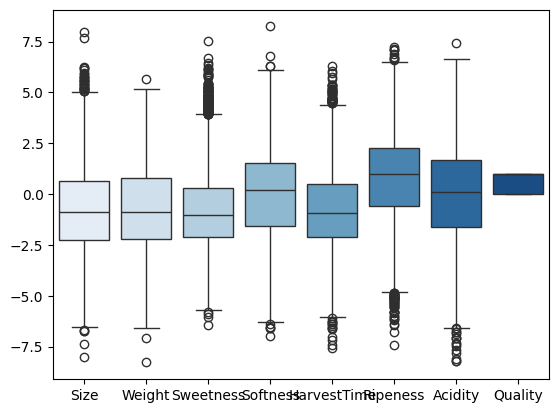

In [95]:
sns.boxplot(data=df, palette="Blues")
plt.show()

<Axes: >

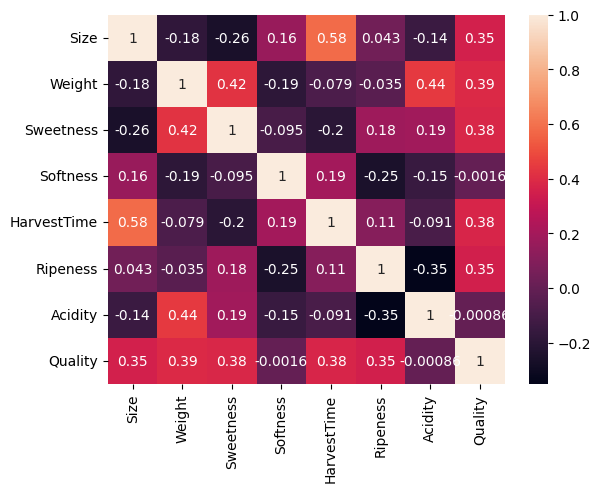

In [96]:
sns.heatmap(df.corr(), annot=True)

In [97]:
from sklearn.model_selection import train_test_split
x = df.drop(["Quality"], axis=True)
y = df["Quality"]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test,y_pred))
print(f"Accuracy : {accuracy*100:.2f} %")


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       815
           1       0.96      0.98      0.97       785

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600

Accuracy : 97.06 %


In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))

Mean Absolute Error :  0.029375
Mean Squared Error :  0.029375
Root Mean Squared Error :  0.1713913650100261
R2 Score :  0.8824586768785901


In [114]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({"feature":x.columns,"importance":importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
1,Weight,0.165368
2,Sweetness,0.165354
4,HarvestTime,0.159823
0,Size,0.149174
5,Ripeness,0.143886
3,Softness,0.138030
6,Acidity,0.078365
